In [63]:
# Manipulación de datos
# =============================================================================
import numpy as np
import pandas as pd

# Visualización de datos
# =============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [17]:
# Carga del conjunto de datos
# =============================================================================
iris = load_iris()
# Convirtiendo a Dataframe
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['species'])
iris.columns = ['sepal_largo','sepal_ancho','petal_largo','petal_ancho','especies']

In [18]:
# Muestra del dataframe
iris.head()

,sepal_largo,sepal_ancho,petal_largo,petal_ancho,especies
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [19]:
# Información de los datos
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepal_largo  150 non-null    float64
 1   sepal_ancho  150 non-null    float64
 2   petal_largo  150 non-null    float64
 3   petal_ancho  150 non-null    float64
 4   especies     150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [20]:
# Forma del conjunto de datos
iris.shape

(150, 5)

In [22]:
# Cantidad de observaciones por especie
iris['especies'].value_counts()

0.0    50
2.0    50
1.0    50
Name: especies, dtype: int64

In [23]:
# Estadística descriptiva
iris.describe()

,sepal_largo,sepal_ancho,petal_largo,petal_ancho,especies
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [24]:
# División del conjunto de datos para entrenamiento y prueba
# ==================================================================================
train, test = train_test_split(iris, test_size = 0.4, stratify = iris['especies'], random_state = 42)

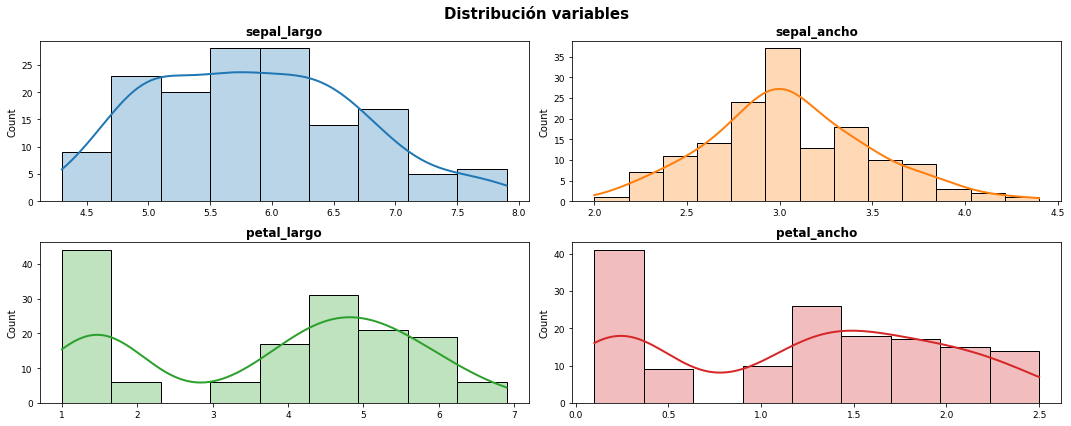

In [25]:
# Gráfico de distribuciones
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))
axes = axes.flat
columnas_numeric = iris.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('especies')
for i, column in enumerate(columnas_numeric):
    sns.histplot(
        data    = iris,
        x       = column,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(column, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 9)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables', fontsize = 15, fontweight = "bold");

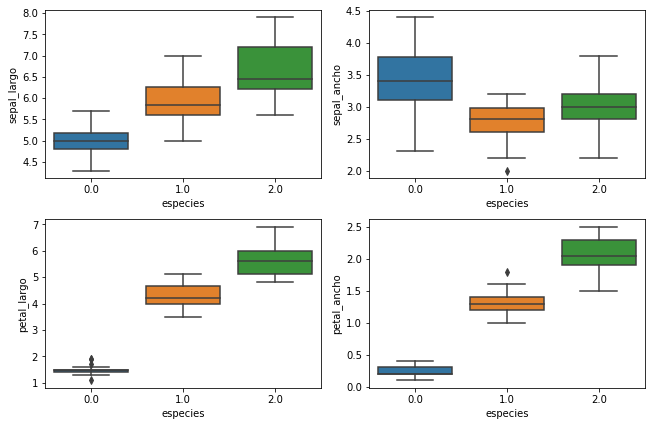

In [33]:
# Distribuciones (boxplots)
# ============================================================================
fig, axs = plt.subplots(2, 2, figsize=(9,6))
cn = ['setosa', 'versicolor', 'virginica']
sns.boxplot(x='especies', y='sepal_largo', data=train, ax=axs[0,0]);
sns.boxplot(x='especies', y ='sepal_ancho', data=train, ax=axs[0,1]);
sns.boxplot(x ='especies', y = 'petal_largo', data=train, ax=axs[1,0]);
sns.boxplot(x ='especies', y = 'petal_ancho', data=train, ax=axs[1,1]);
# add some spacing between subplots
fig.tight_layout(pad=1.0)

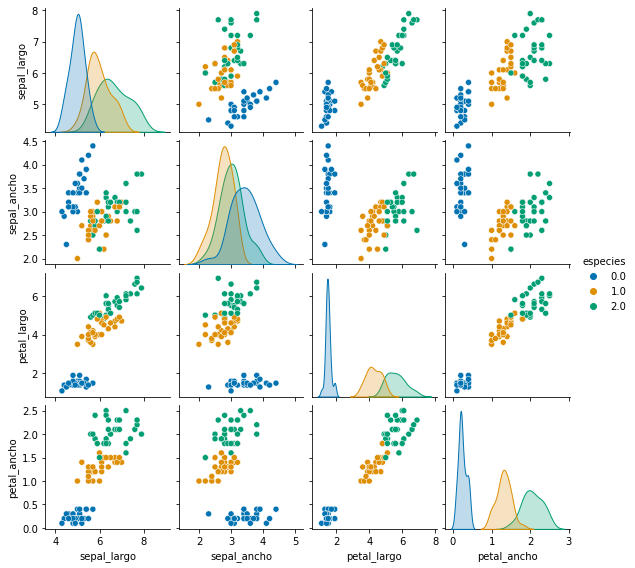

In [34]:
sns.pairplot(train, hue="especies", height = 2, palette = 'colorblind')

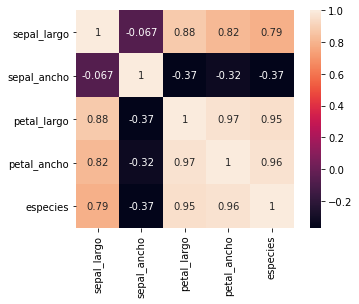

In [36]:
corrmat = train.corr()
sns.heatmap(corrmat, annot = True, square = True)
plt.show()

In [37]:
# División de conjuntos de datos
# ==================================================================================
X_train = train[['sepal_largo','sepal_ancho','petal_largo','petal_ancho']]
y_train = train.especies
X_test = test[['sepal_largo','sepal_ancho','petal_largo','petal_ancho']]
y_test = test.especies

In [67]:
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=1)
dt_clf.fit(X_train,y_train)
prediction = cross_val_predict(dt_clf, X_train, y_train, cv=10, n_jobs=-1)
print("The accuracy of the Decision Tree is " + str(accuracy_score(y_train, prediction)))

The accuracy of the Decision Tree is 0.9333333333333333


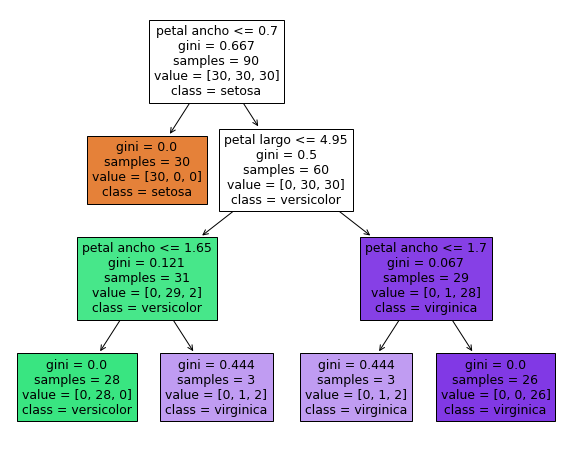

In [68]:
plt.figure(figsize = (10,8))
plot_tree(dt_clf, feature_names = fn, class_names = cn, filled = True);